In [1]:
import numpy as np
import matplotlib.pyplot as plt
 

Utility function U(x) = x^(1-gamma)/(1-gamma)  : CRRA.  gamma = 1 is log utility
CE is \[
CE = \left( p_1 x_1^{1-\gamma} + p_2 x_2^{1-\gamma} \right)^{\frac{1}{1-\gamma}}.
\]


In [87]:
# set gamma ... 1 = log utility
gamma = 3
#gamma = 1
#gamma = 2
#gamma = 4

# pVaR no mangrove
p1 = np.array([0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43, 0.45])

# pVaR with mangrove (reductoin relative to p1)
M = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
p2m = p1[:, np.newaxis] - M   # this is a matrix 
p2 = p2m.flatten()

# value loss threshold relative to no hurricane
w1 = 1  # no loss
w2 = 0.25   # 25% value loss
#w2 = 0.35
#w2 = 0.15

# property value in millions before loss 
H = 1000000

print(len(p2))

160


In [145]:
# expected utility function
def wtpf(gamma,w2):
    p1 = np.array([0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27, 0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43, 0.45])
# pVaR with mangrove (reductoin relative to p1)
    M = np.array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
    p2m = p1[:, np.newaxis] - M   # this is a matrix 
    p2 = p2m.flatten()
    w1 = 1
    H = 1000000 
    
    u1  = (H*w1)**(1-gamma) / (1-gamma) if gamma != 1 else np.log(H*w1)
    u2  = (H*w2)**(1-gamma) / (1-gamma) if gamma != 1 else np.log(H*w2)

    eu1, eu2, ce1, ce2, wtp, p2, wtp17 = [np.zeros((len(p1), len(M))) for _ in range(7)]

    for n in range(1,len(p1)):
        for m in range(1,len(M)):
            pr1 = p1[n]
            pr2 = pr1 - M[m]
            p2[n, m] = pr2
            eu1[n, m] = (1-pr1)*u1 + pr1*u2
            eu2[n, m] = (1-pr2)*u1 + pr2*u2
            ce1[n, m] = ((1-pr1)*((H*w1)**(1-gamma)) +  pr1*((H*w2)**(1-gamma)))**(1/(1-gamma)) if gamma != 1 else (H*w1)**(1-pr1)*(H*w2)**pr1
            ce2[n, m] = ((1-pr2)*((H*w1)**(1-gamma)) +  pr2*((H*w2)**(1-gamma)))**(1/(1-gamma)) if gamma != 1 else (H*w1)**(1-pr2)*(H*w2)**pr2
            wtp[n, m] = (ce2[n, m]) - (ce1[n, m])
            wtp1[n, m] = eu2[n, m] - eu1[n, m]
    return wtp

0.15
1


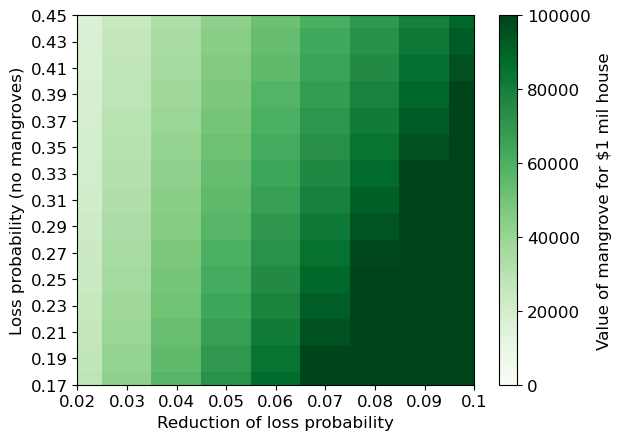

0.2
1


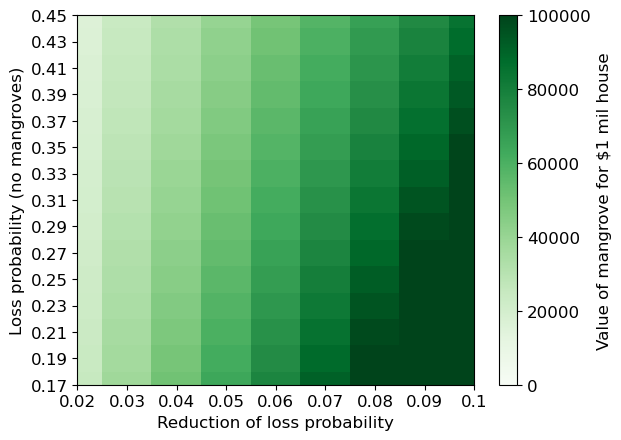

0.25
1


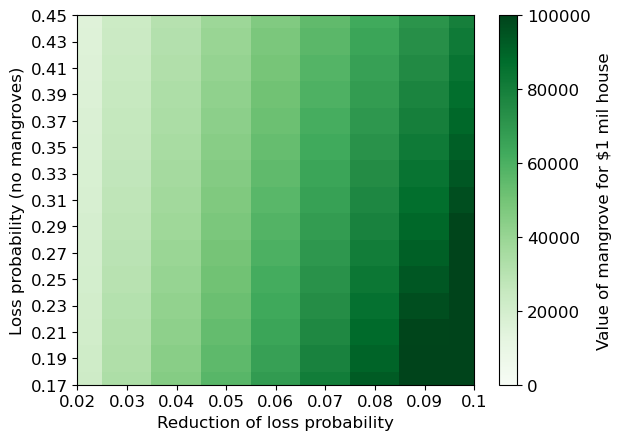

0.3
1


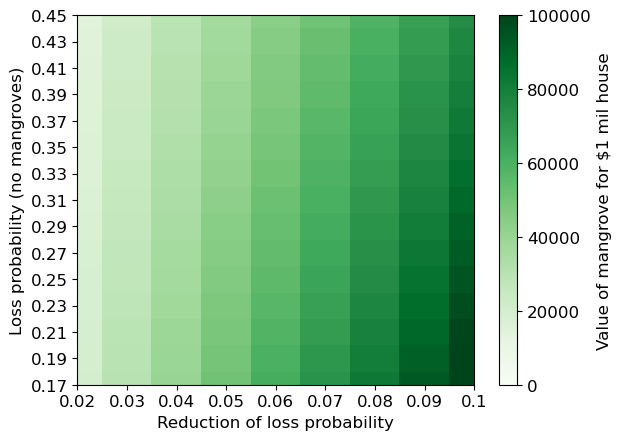

0.35
1


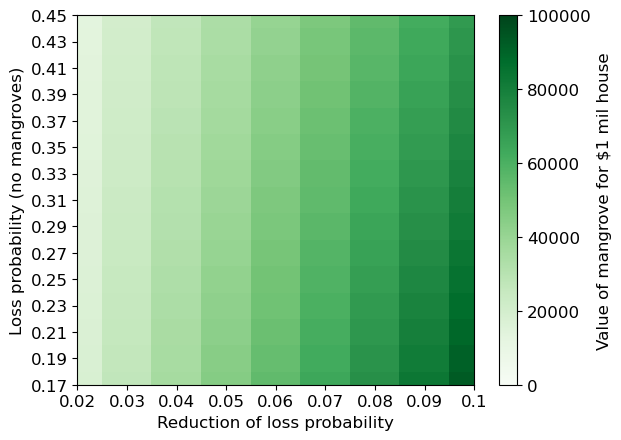

0.15
2


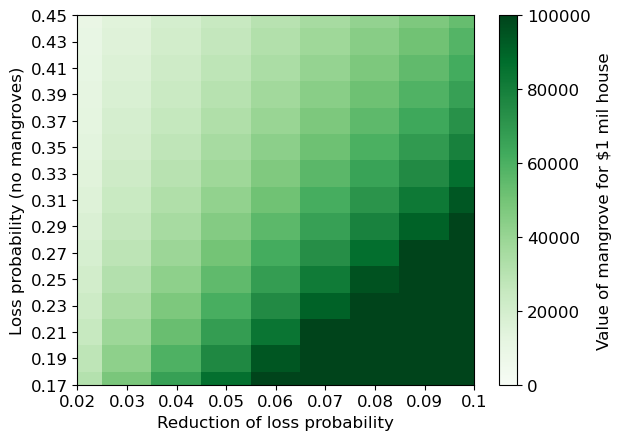

0.2
2


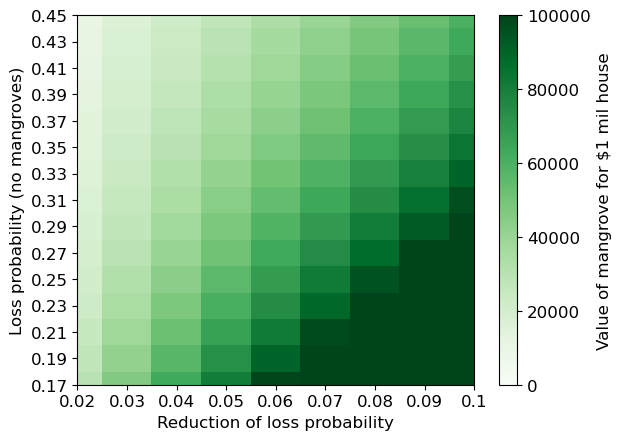

0.25
2


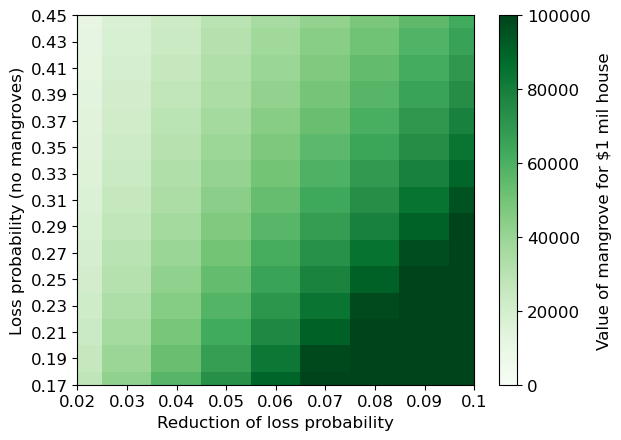

0.3
2


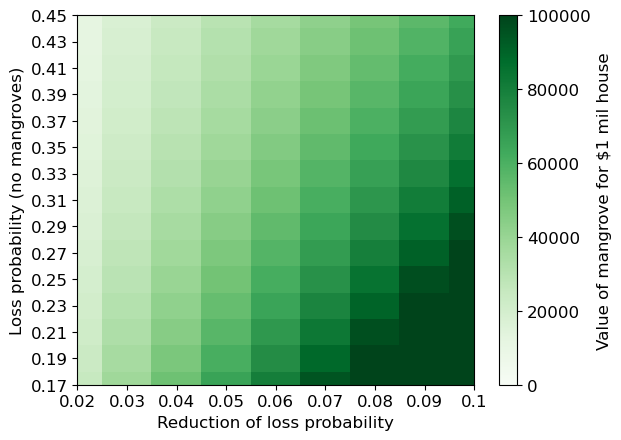

0.35
2


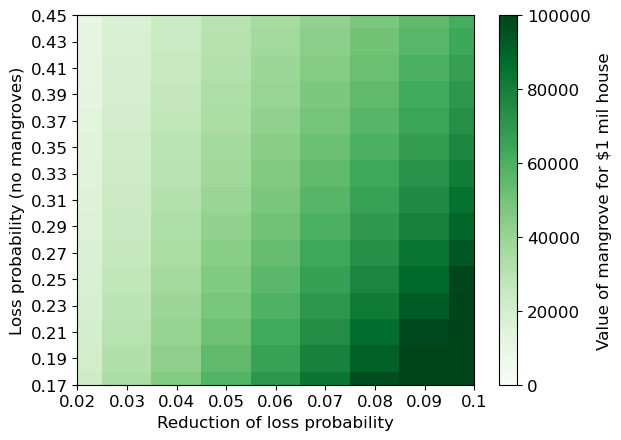

0.15
3


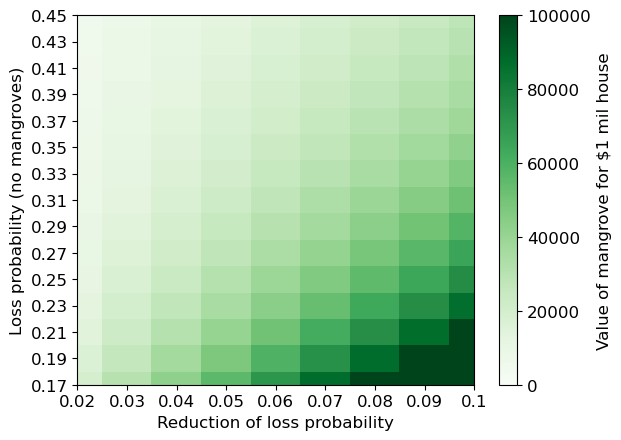

0.2
3


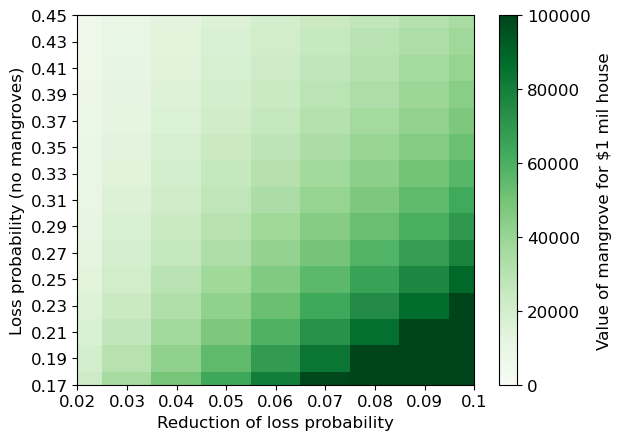

0.25
3


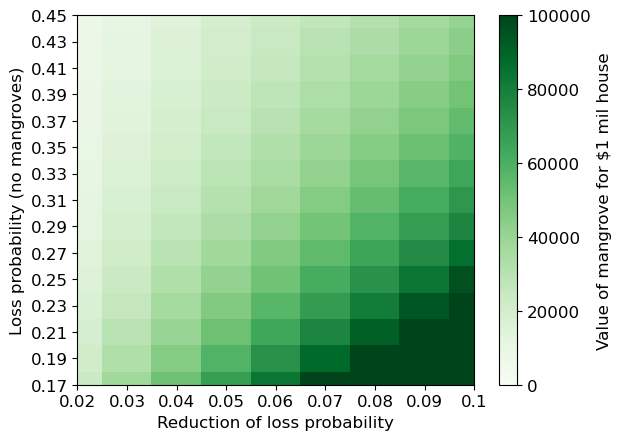

0.3
3


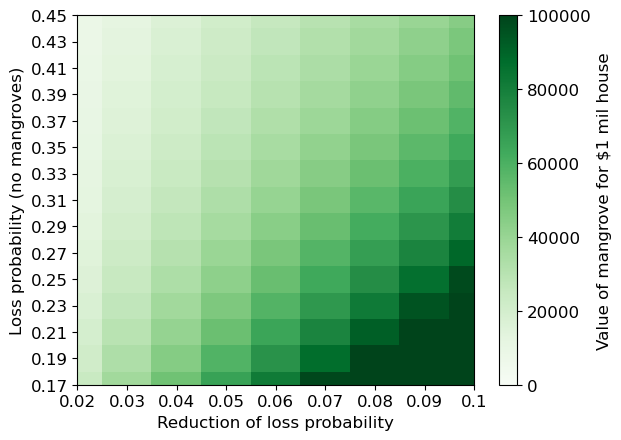

0.35
3


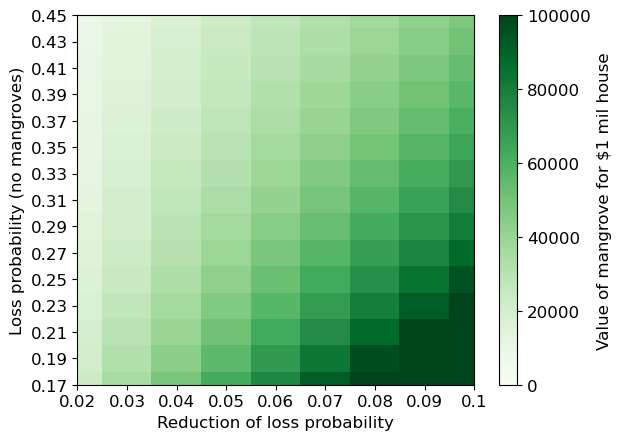

0.15
4


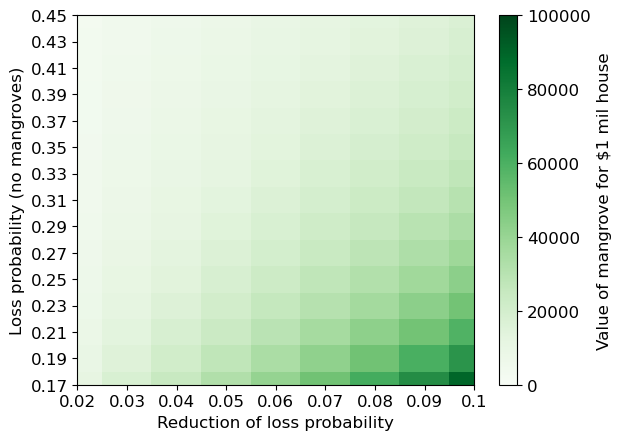

0.2
4


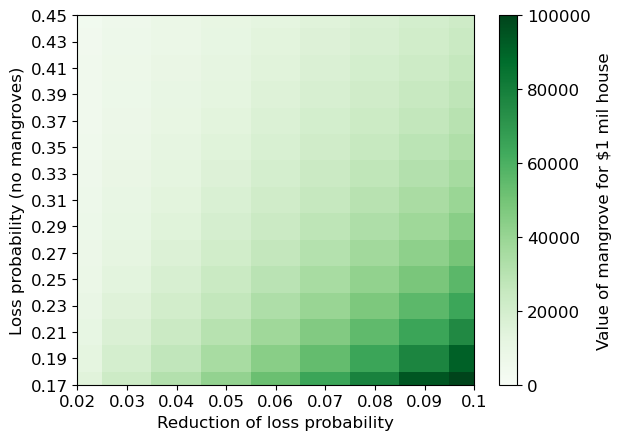

0.25
4


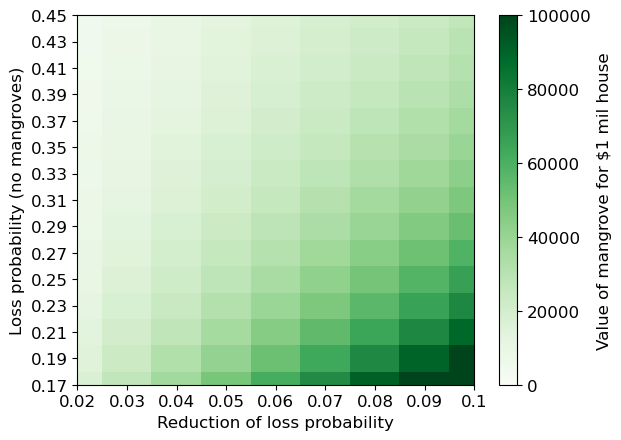

0.3
4


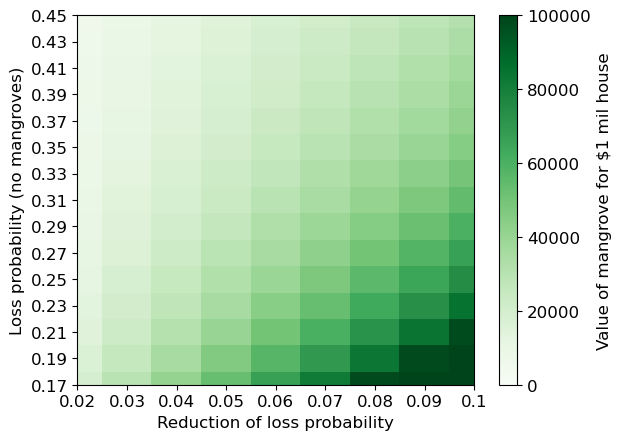

0.35
4


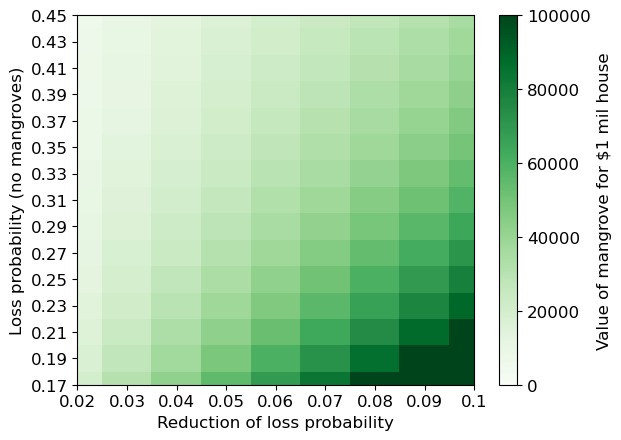

In [175]:
# Plot the heatmap

for gamma in range(1, 5): 
    for ww2 in range(3,8):
        w2 = ww2*5/100
        w2p= int(w2*100)
        print(w2)
        print(gamma)
        wtp = wtpf(gamma,w2)
        plt.rc('font', family='sans-serif', size=12)  # Use 'serif' font and size 12 for all text
        plt.imshow(wtp, origin='lower', aspect='auto', cmap='Greens', vmin=0, vmax=100000)
        plt.yticks(ticks=np.arange(len(p1)), labels=np.round(p1, 2))
        plt.xticks(ticks=np.arange(len(M)), labels=np.round(M, 2))
        plt.xlim(left=1, right=len(M) - 1)  # Limit x-axis to matrix size
        plt.ylim(bottom=1, top=len(p1) - 1)  # Limit y-axis to matrix size
        plt.colorbar(label='Value of mangrove for $1 mil house')  # Add color bar
        plt.ylabel('Loss probability (no mangroves)')
        plt.xlabel('Reduction of loss probability')
        file_name = f"../../Results/Figures/wtp{w2p}_{gamma}.png"
        plt.savefig(file_name, format='png', dpi=300, bbox_inches='tight', facecolor='white')
        plt.show()

In [7]:
pwd

'/Users/gbhale/Dropbox/!!OngoingProjects/AdaptationMarketplace'